Logistic Regression Results:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Decision Tree Results:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



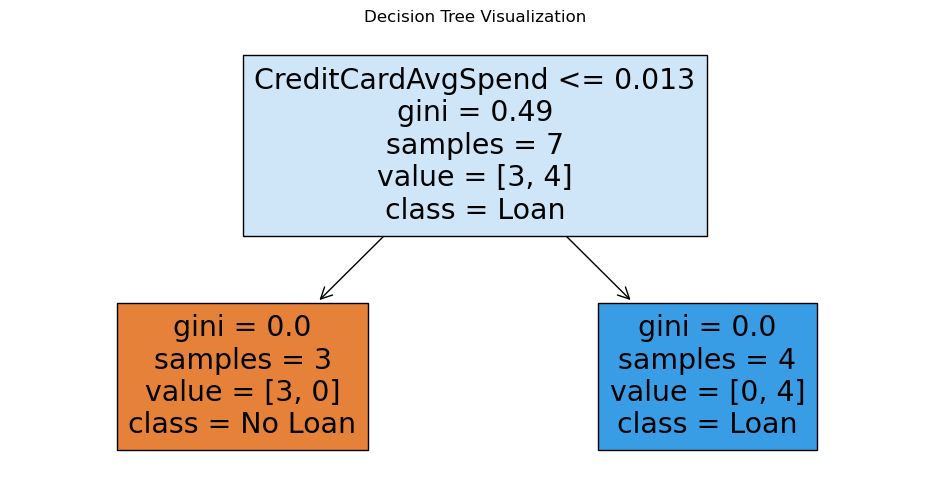

C:\Users\senth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\senth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


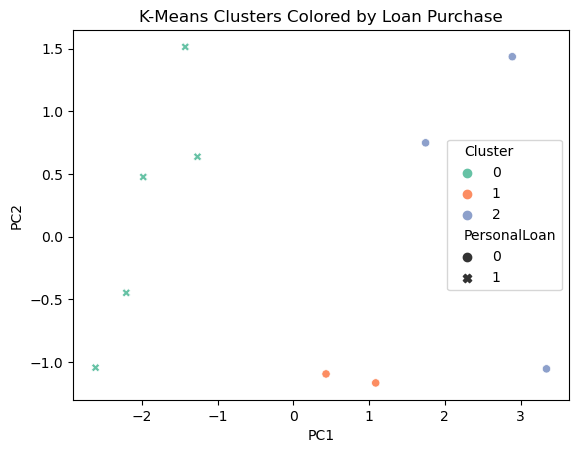

Loan Rate by Cluster:
 Cluster
0    1.0
1    0.0
2    0.0
Name: PersonalLoan, dtype: float64
Feature Importance (Decision Tree):
 CreditCardAvgSpend    1.0
Age                   0.0
Income                0.0
Education             0.0
Family                0.0
Online                0.0
dtype: float64


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1. Define a synthetic dataset
data = {
    'Age': [25, 45, 35, 50, 23, 40, 29, 61, 48, 36],
    'Income': [30, 85, 60, 120, 25, 95, 45, 150, 110, 70],
    'Education': [1, 3, 2, 3, 1, 3, 2, 2, 3, 2],  # 1: Undergrad, 2: Grad, 3: Advanced
    'Family': [4, 3, 1, 2, 1, 4, 3, 2, 3, 1],
    'CreditCardAvgSpend': [1.5, 4.2, 3.1, 5.5, 1.1, 4.8, 2.6, 6.0, 5.2, 3.3],
    'Online': [0, 1, 1, 1, 0, 1, 0, 1, 1, 0],
    'PersonalLoan': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0]  # Target variable
}

df = pd.DataFrame(data)

# ✅ 2. Split into features and target
X = df.drop('PersonalLoan', axis=1)
y = df['PersonalLoan']

# ✅ 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# ✅ 5. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("Logistic Regression Results:\n", classification_report(y_test, y_pred_log))

# ✅ 6. Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Results:\n", classification_report(y_test, y_pred_tree))

# ✅ Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=["No Loan", "Loan"])
plt.title("Decision Tree Visualization")
plt.show()

# ✅ 7. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ Plot clusters using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', style='PersonalLoan')
plt.title("K-Means Clusters Colored by Loan Purchase")
plt.show()

# ✅ Cluster-wise loan purchase rate
print("Loan Rate by Cluster:\n", df.groupby('Cluster')['PersonalLoan'].mean())

# ✅ Feature importances from decision tree
importances = pd.Series(tree.feature_importances_, index=X.columns)
print("Feature Importance (Decision Tree):\n", importances.sort_values(ascending=False))
